In [1]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob

In [2]:
pickle_path = "/home/dena/Documents/Gym_RTC/gym-example/rates_delay_loss.pickle"
l_rate = pd.read_pickle(pickle_path)

In [3]:
len(l_rate)

4

In [4]:
i=3
df = pd.DataFrame(l_rate[i]["list_of_packets"])
df

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc,first_packet,last_packet
0,150,24,0,1394,126,35,1,12648429,True,None
1,164,24,0,1394,126,40,2,12648429,None,None
2,179,24,0,1394,126,50,3,12648429,None,None
3,194,24,0,1394,126,60,4,12648429,None,True
4,208,24,0,1395,126,70,5,12648429,True,None
...,...,...,...,...,...,...,...,...,...,...
2501,57514,24,0,861,126,57404,2502,12648429,None,None
2502,57541,24,0,748,126,57434,2503,12648429,None,None
2503,57547,24,0,749,126,57439,2504,12648429,None,None
2504,57576,24,0,748,126,57469,2505,12648429,None,None


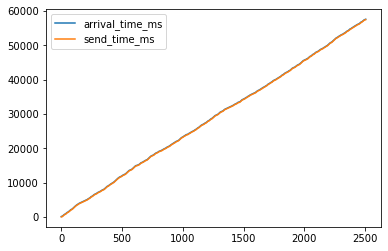

In [5]:
df[["arrival_time_ms", "send_time_ms"]].plot()

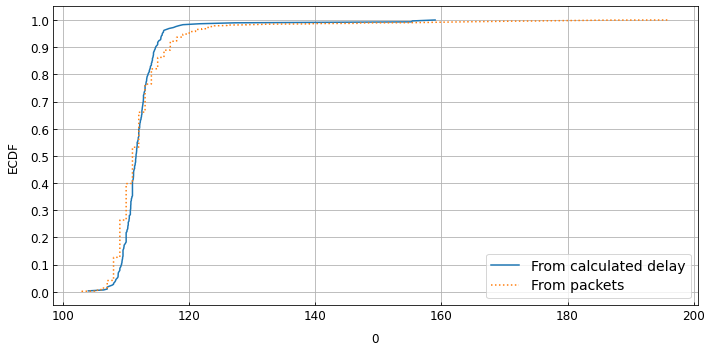

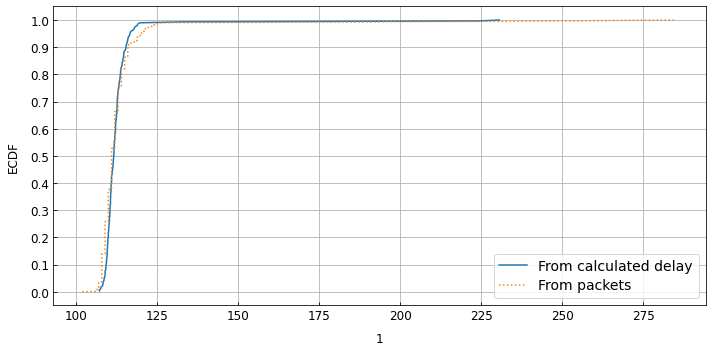

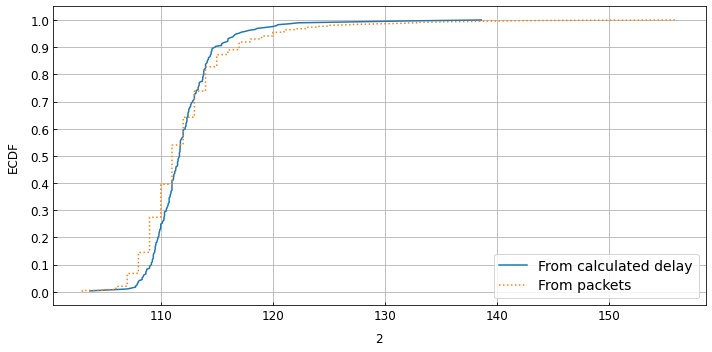

In [6]:
for i in range(0,len(l_rate)-1):
    average_delay = l_rate[i]["delay"]
    df = pd.DataFrame(l_rate[i]["list_of_packets"])
    delay_from_packets = df["arrival_time_ms"] - df["send_time_ms"]

    a = plot_cdf_multiple([average_delay, delay_from_packets], i, legend=["From calculated delay", "From packets"])
    #     plt.xlim(0,200)

In [7]:
# trace_name = l_rate[0]["trace"]
# print(trace_name)

# with open(trace_name, "r") as f:
#     d = json.load(f)

# df = pd.DataFrame(d["uplink"]["trace_pattern"])
# time = [0] + list(df["duration"].cumsum())
# capacities = [df["capacity"].iloc[0]] + list(df["capacity"])

# s = pd.Series(index=pd.to_datetime(time, unit="ms"), data=capacities)
# s.head(-10)

In [8]:
# s.resample("200ms").ffill()

## Main code

In [13]:
pickle_path = "/home/dena/Documents/Gym_RTC/gym-example/rates_delay_loss.pickle"
l_rate = pd.read_pickle(pickle_path)

time_step = 200

In [12]:
l_rate[0].keys()

dict_keys(['trace', 'bandwidth_prediction', 'sending_rate', 'receiving_rate', 'delay', 'loss_ratio', 'log_prediction', 'reward'])

/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json
/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json
/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json
/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json
/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json
/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json


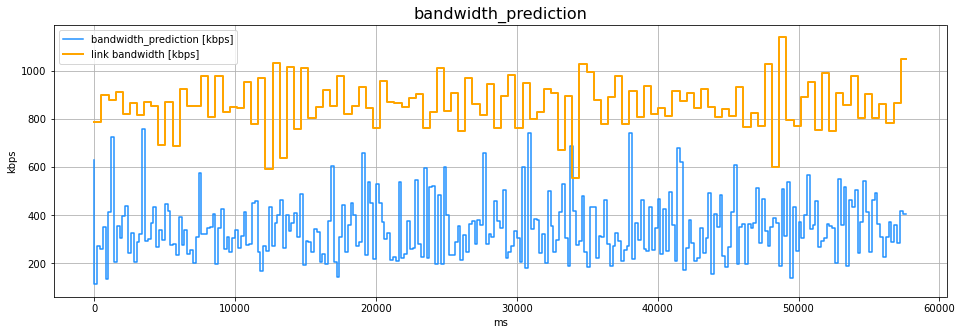

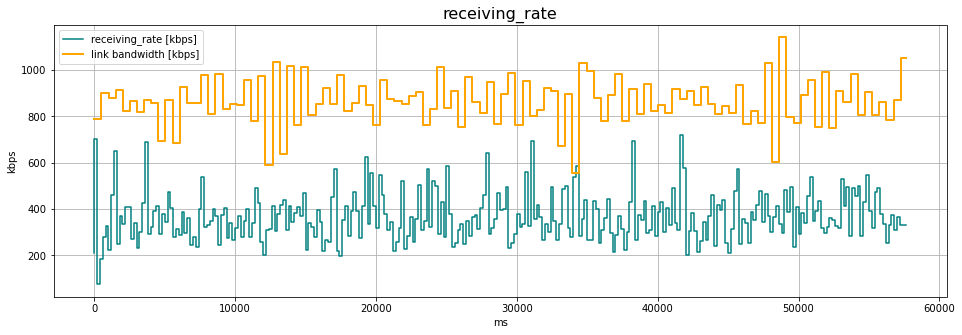

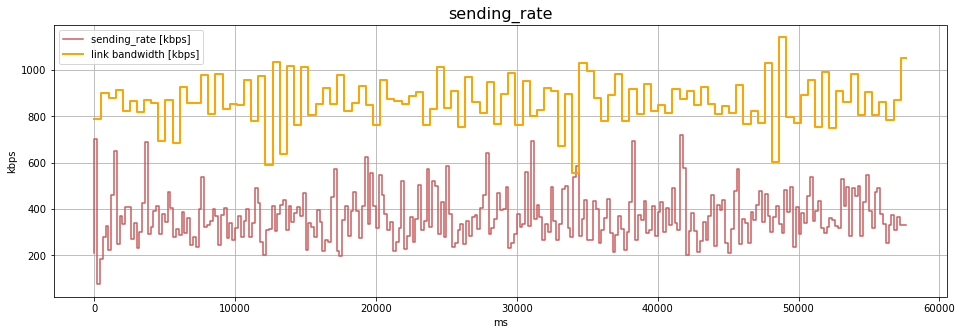

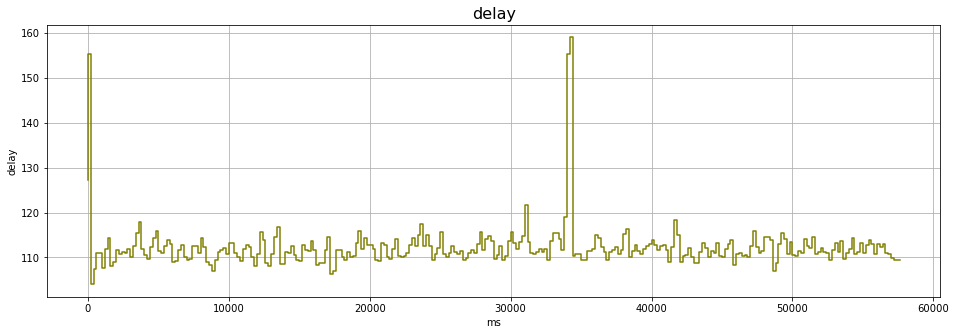

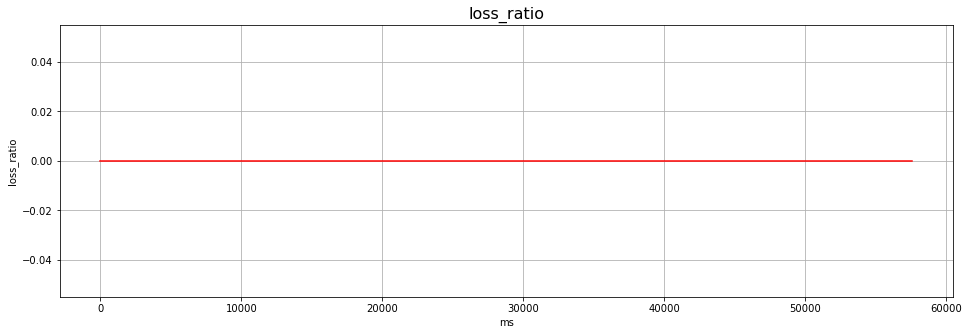

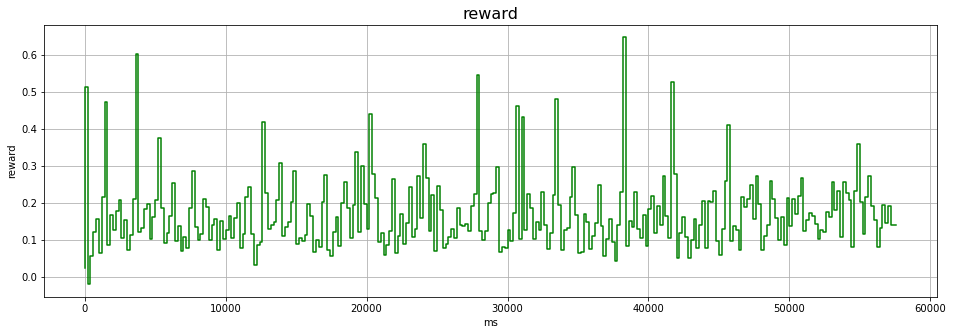

In [9]:
colors = iter(["dodgerblue", "teal", "indianred", "olive", "red", "green"])

# for i in range(len(l_rate)):
for i in [0]:
    
    for metric in ["bandwidth_prediction", "receiving_rate", "sending_rate", "delay", "loss_ratio", "reward"]:
    
        #Define capacity
        trace_name = l_rate[i]["trace"]
        print(trace_name)

        with open(trace_name, "r") as f:
            d = json.load(f)

        df = pd.DataFrame(d["uplink"]["trace_pattern"])
        time = [0] + list(df["duration"].cumsum())
        capacities = [df["capacity"].iloc[0]] + list(df["capacity"])    

        df_rate = pd.DataFrame(l_rate[i][metric], columns=[metric])
        
        t = np.arange(len(df_rate))*time_step
        df_rate["time"] = t
        df_rate.set_index("time", inplace=True)
        
        if metric in ["bandwidth_prediction", "sending_rate", "receiving_rate"]:

            plt.figure(figsize=(16,5))
            plt.title(metric, fontsize=16)
            plt.step(df_rate.index, df_rate[metric]/1000, label=f"{metric} [kbps]", color=next(colors))
            plt.step(time, capacities, lw=2, label="link bandwidth [kbps]", color="orange")
            plt.legend()
            plt.ylabel("kbps")
            plt.xlabel("ms")
            plt.grid()
#             plt.ylim(0,10000)
            
        else:
            plt.figure(figsize=(16,5))
            plt.title(metric, fontsize=16)
            plt.step(df_rate.index, df_rate[metric], label=f"{metric}", color=next(colors))
            plt.ylabel(metric)
            plt.xlabel("ms")
            plt.grid()

In [15]:
# metric = "sending_rate"

# df_rate = pd.DataFrame(l_rate[i][metric], columns=[metric])
# df_rate = df_rate/1000
# df_rate

In [16]:
# (df_rate["sending_rate"] > pd.Series(capacities)).sum()

In [17]:
# metric = "reward"

# reward = l_rate[i][metric]
# plt.plot(reward)

## Stable baselines implementation

In [18]:
pickle_path = "/home/dena/Documents/Gym_RTC/gym-example/rates_delay_loss_sb.pickle"
l_rate = pd.read_pickle(pickle_path)

time_step = 200

/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json
/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json
/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json
/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json
/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json
/home/dena/Documents/Gym_RTC/gym-example/traces/WIRED_900kbps.json


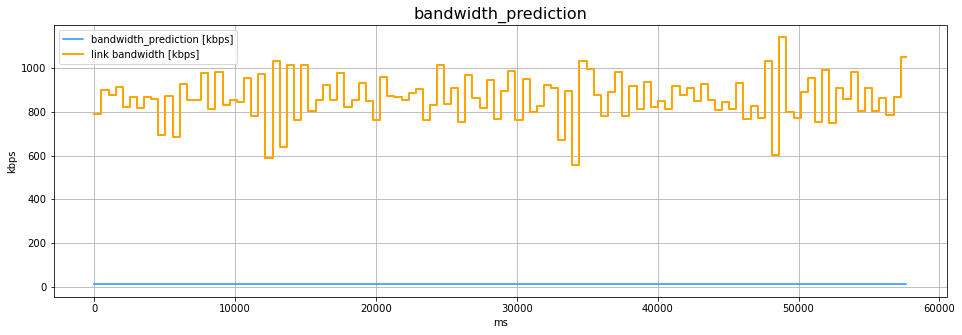

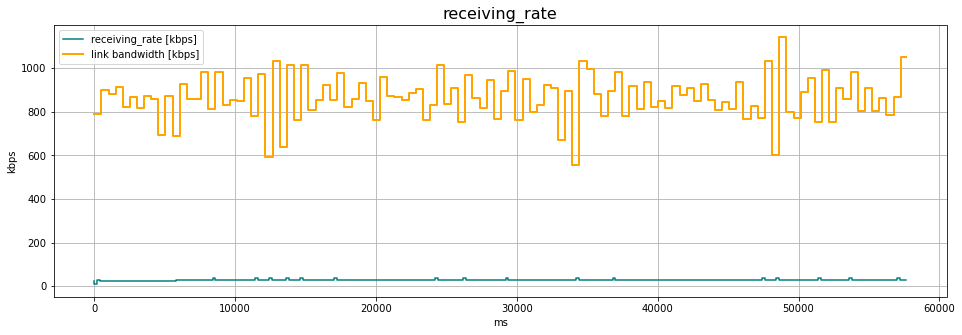

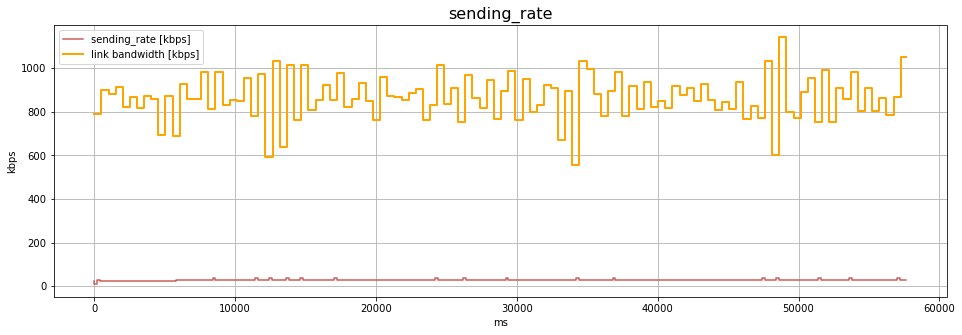

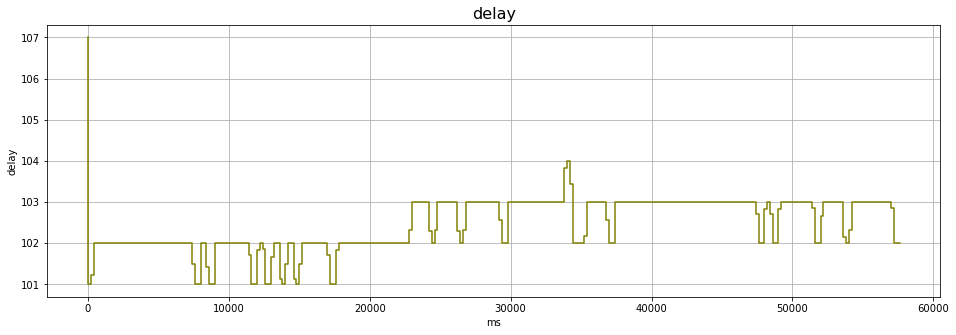

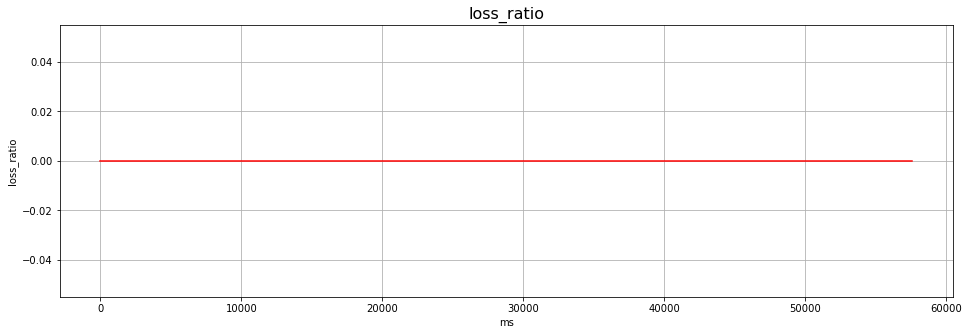

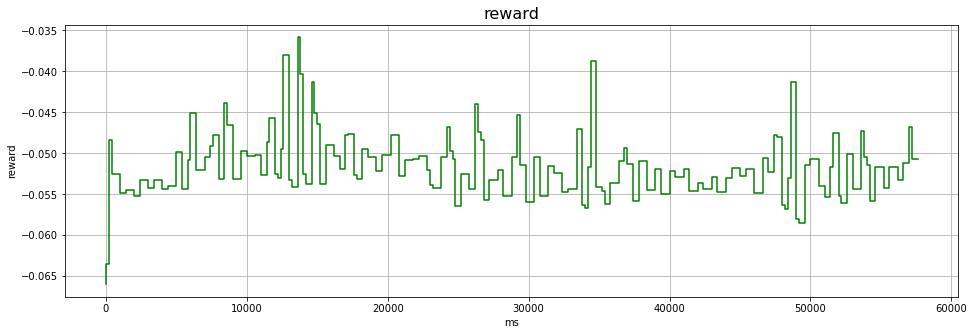

In [19]:
colors = iter(["dodgerblue", "teal", "indianred", "olive", "red", "green"])

for metric in ["bandwidth_prediction", "receiving_rate", "sending_rate", "delay", "loss_ratio", "reward"]:

    #Define capacity
    trace_name = l_rate["trace"]
    print(trace_name)

    with open(trace_name, "r") as f:
        d = json.load(f)

    df = pd.DataFrame(d["uplink"]["trace_pattern"])
    time = [0] + list(df["duration"].cumsum())
    capacities = [df["capacity"].iloc[0]] + list(df["capacity"])    

    df_rate = pd.DataFrame(l_rate[metric], columns=[metric])

    t = np.arange(len(df_rate))*time_step
    df_rate["time"] = t
    df_rate.set_index("time", inplace=True)

    if metric in ["bandwidth_prediction", "sending_rate", "receiving_rate"]:

        plt.figure(figsize=(16,5))
        plt.title(metric, fontsize=16)
        plt.step(df_rate.index, df_rate[metric]/1000, label=f"{metric} [kbps]", color=next(colors))
        plt.step(time, capacities, lw=2, label="link bandwidth [kbps]", color="orange")
        plt.legend()
        plt.ylabel("kbps")
        plt.xlabel("ms")
        plt.grid()
#             plt.ylim(0,10000)

    else:
        plt.figure(figsize=(16,5))
        plt.title(metric, fontsize=16)
        plt.step(df_rate.index, df_rate[metric], label=f"{metric}", color=next(colors))
        plt.ylabel(metric)
        plt.xlabel("ms")
        plt.grid()

## TODO: Figure out sending rate!!

In [ ]:
df_packets = pd.DataFrame(l_rate[0]["list_of_packets"])
df_packets

In [ ]:
dff = df_packets[df_packets.ssrc ==12648429].sort_values(by="sequence_number").sequence_number.diff()
dff

In [ ]:
dff[dff != 1]

In [ ]:
df_packets.loc[1617:1664]

In [ ]:
interval2 = dff.arrival_time_ms.diff()[1::2]
interval2[interval2 > 60]

In [ ]:
interval = dff.send_time_ms.diff()[1::2]
interval

In [ ]:
interval[interval>60].index

In [ ]:
df_packets[df_packets.sequence_number == 31]

In [ ]:
dff.loc[[20,21,22,23,70,71]]

In [ ]:
df_packets.loc[18:70]